In [47]:
import pandas as pd
import numpy as np
import random
import time
import datetime


**Lecture et concaténation des historiques disponibles - Export au format json**

In [48]:
### Pour les historiques sans Genre défini, tout mis à 'undefined' pour permettre le Select Genre 
history_cd   = pd.read_csv('./history_CD.csv')
history_deez = pd.read_csv('./history_Deez.csv')

all_history  = history_cd.append(history_deez)
all_history  = all_history[['User', 'Date', 'Jour', 'Week_day', 'Heure', 'Artiste', 'Titre', 'Song', 'Genre']]

all_history.reset_index(inplace=True)

all_history.to_csv('./all_history.csv')
all_history.to_json('./all_history.json')
#all_history.head()


**Select the user**

In [49]:
def select_user(history_file, user="all_users"):
    if user == "all_users":
        history = history_file
    else :
        history = history_file[history_file['User']==user]
    return history

#history = select_user(all_history)
#history = select_user(all_history, "Deez")
history = select_user(all_history, "M")

history.head()

,index,User,Date,Jour,Week_day,Heure,Artiste,Titre,Song,Genre
0,0,M,2021-01-01 18:28:00,2021-01-01,Vendredi,18,Sonny Rollins,What's new ?,undefined,Jazz/Blues
1,1,M,2021-01-01 19:22:00,2021-01-01,Vendredi,19,Divers,150 ans de passions dans l'Opéra français,undefined,Classique/Contemporain
2,2,M,2021-01-01 21:01:00,2021-01-01,Vendredi,21,Herbie Hancock,Dis is da drums,undefined,Jazz/Blues
3,3,M,2021-01-01 22:03:00,2021-01-01,Vendredi,22,Roger Water,"Music from ""the body""",undefined,Jazz/Blues
4,4,M,2021-01-02 11:10:00,2021-01-02,Samedi,11,Magma,Concert Opera de Reims 1976,undefined,Rock/Folk


**Select the period to visualize**

In [50]:
def select_period(df_history, begin=False, end=False):
    if begin==False:
        begin = min(df_history['Date'])
    if end==False:
        end   = max(df_history['Date'])
    history_period = df_history[begin <= pd.to_datetime(df_history['Date'])]
    history_period = df_history[end >= pd.to_datetime(df_history['Date'])]

    return(history_period)

#filtered_period=select_period(history, pd.to_datetime("2021/10/01"), pd.to_datetime("2021/10/30"))
#filtered_period=select_period(history, begin=pd.to_datetime("2021/10/01"))
#filtered_period=select_period(history, end=pd.to_datetime("2021/10/01"))
filtered_period=select_period(history)

#filtered_period

**Select the genre to visualize**

In [51]:
def select_genre(history, genre=""):
    if len(history[history['Genre']==genre]):
        return(history[history['Genre']==genre])
    else :
        print("No such Genre defined, no filtering applied")
        return(history)

# Exemple de filtre sur le genre 'Rock/Folk'
filtered_genre = select_genre(filtered_period, 'Rock/Folk')

**Ecoutes quotidienne - Tous**

<AxesSubplot:title={'center':'Nbr écoutes quotidiennes'}, xlabel='Jour,Week_day'>

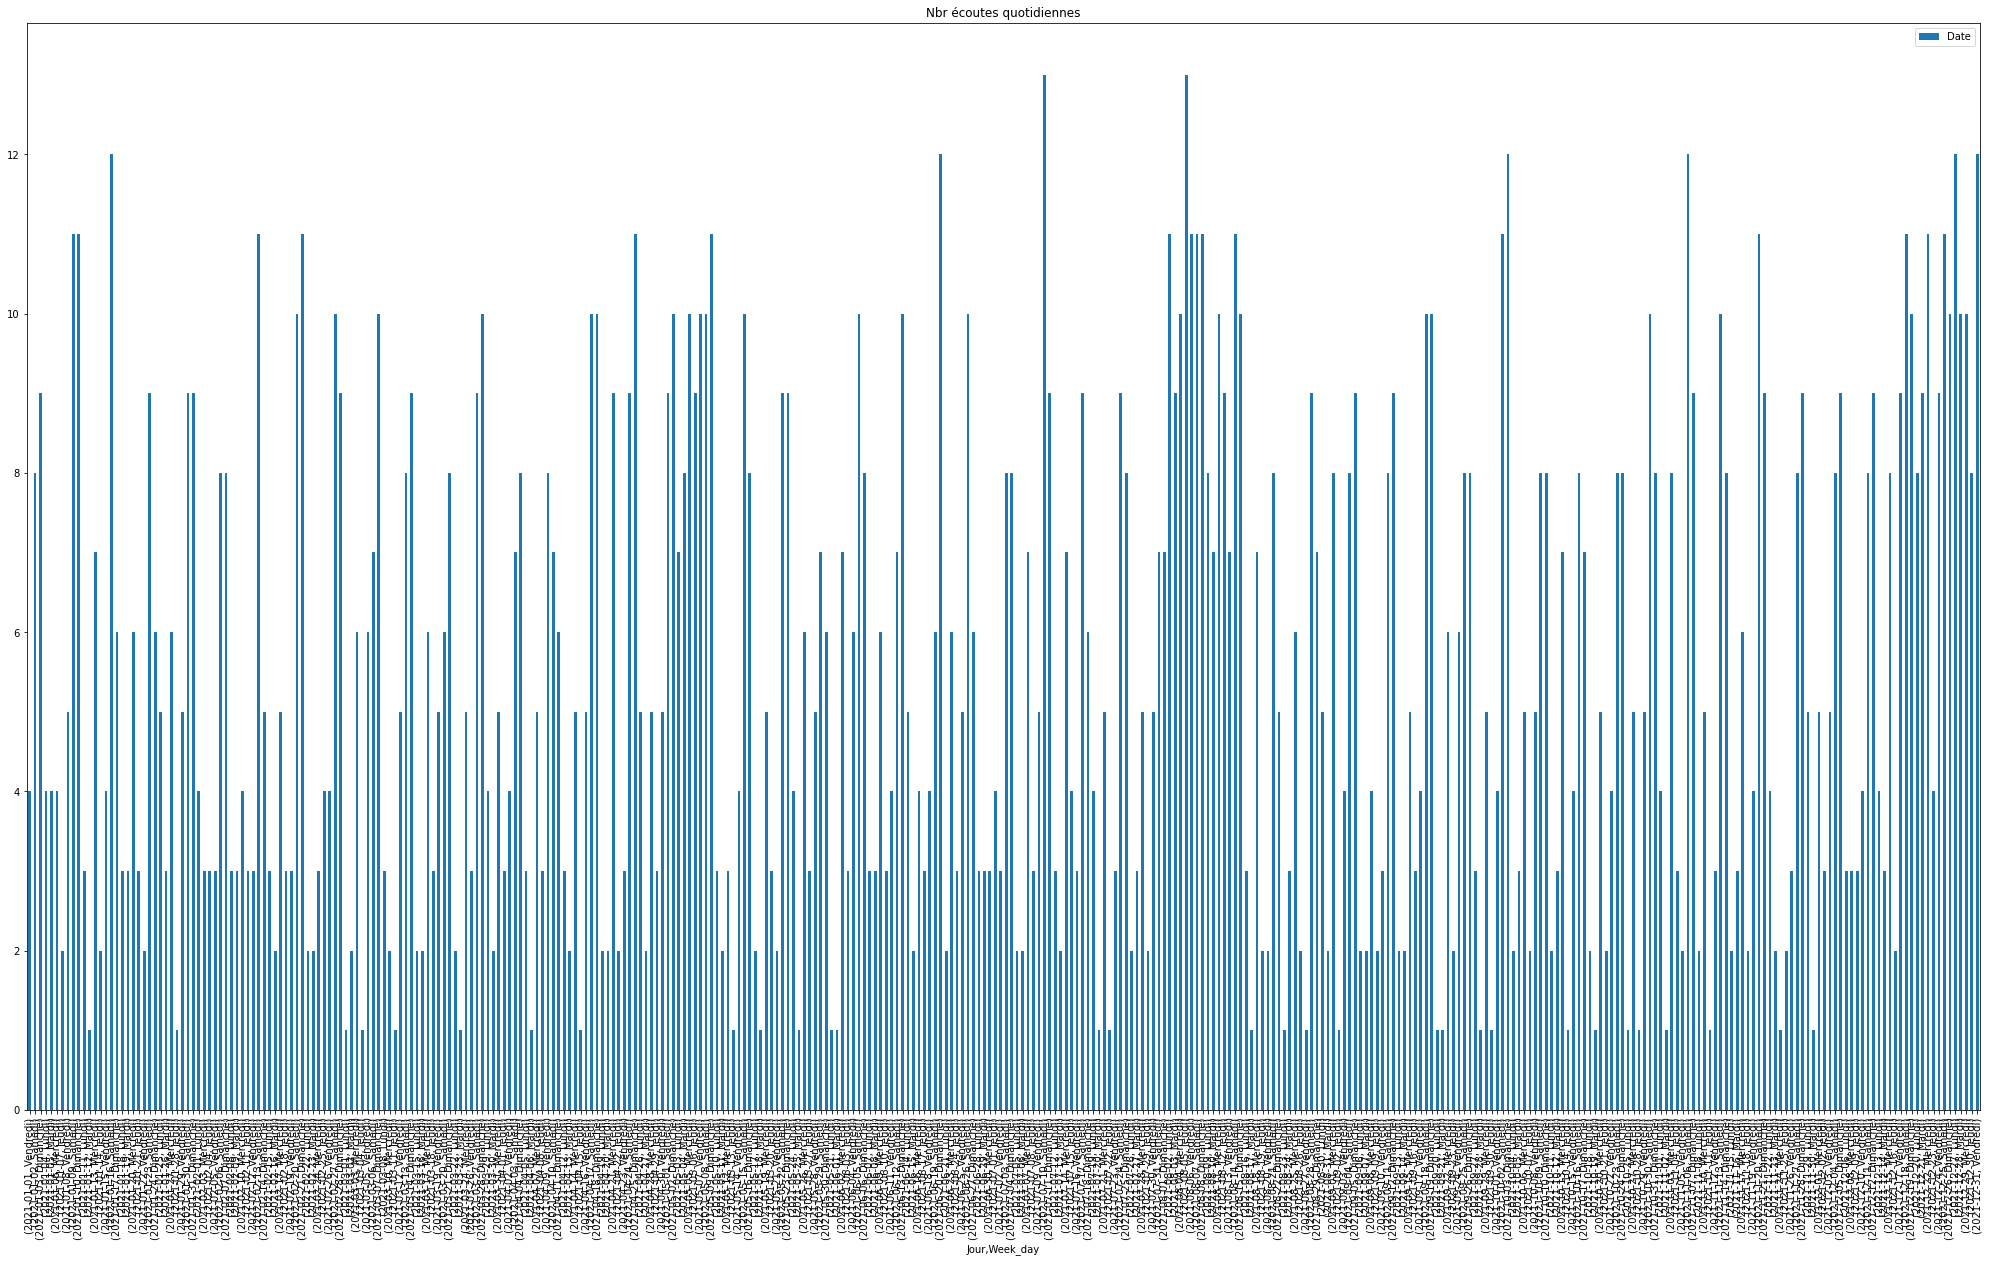

In [52]:
pd.pivot_table(filtered_period, values='Date',index=['Jour', 'Week_day'],aggfunc=len)\
  .plot(kind='bar',figsize=(35, 20), stacked=False, title="Nbr écoutes quotidiennes")

**Ecoutes quotidiennes - Genre='Rock/Folk'**

<AxesSubplot:title={'center':'Nbr écoutes quotidiennes'}, xlabel='Jour,Week_day'>

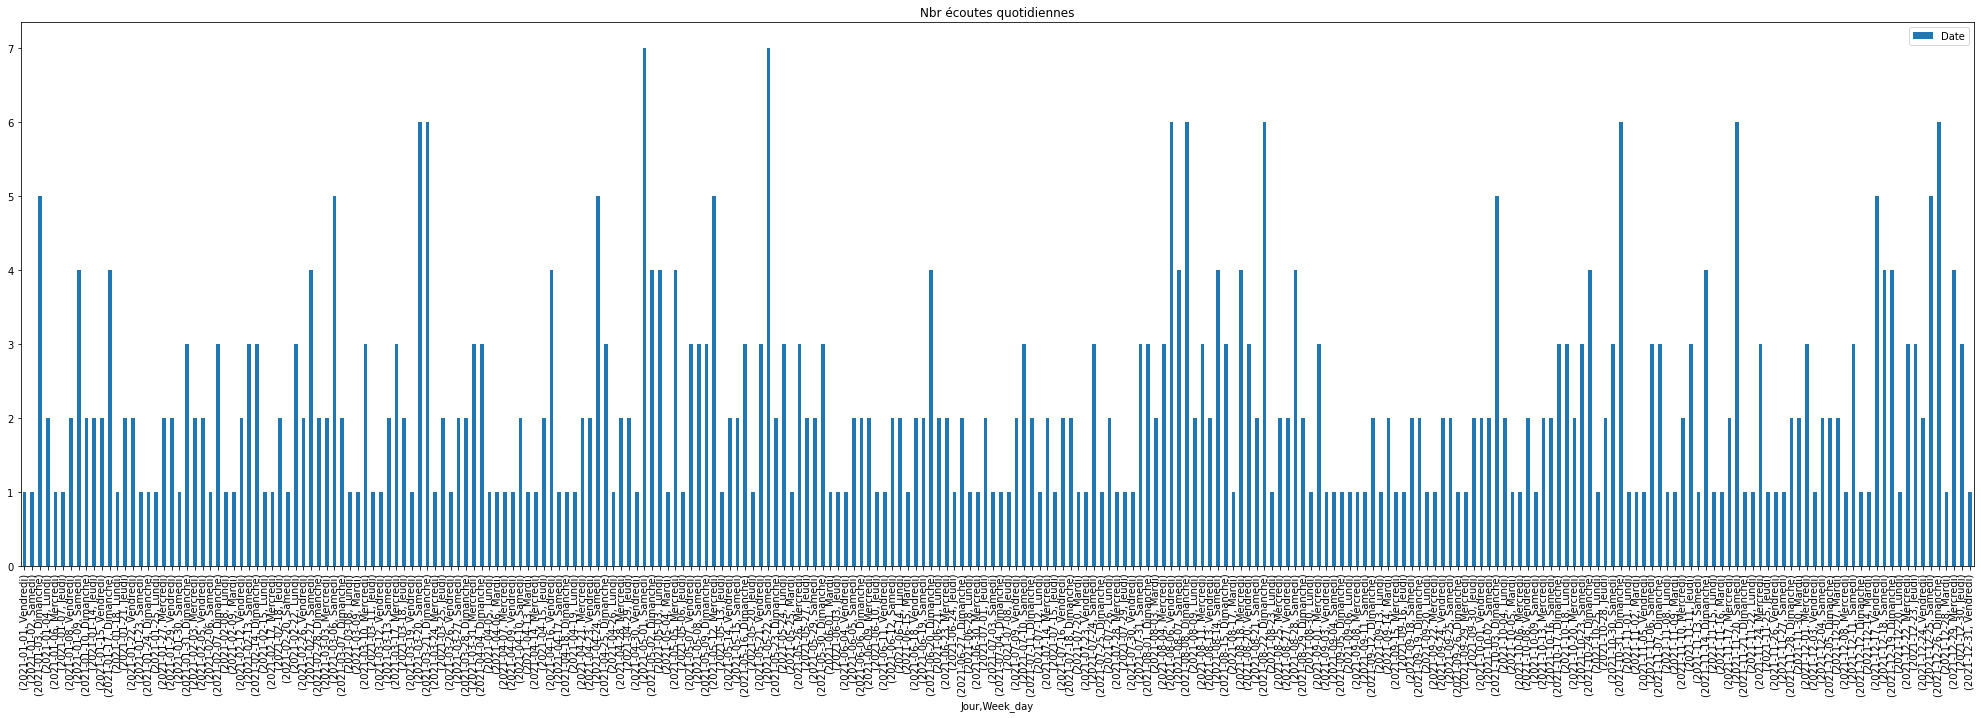

In [7]:
pd.pivot_table(filtered_genre, values='Date',index=['Jour', 'Week_day'],aggfunc=len)\
  .plot(kind='bar',figsize=(35, 10), stacked=False, title="Nbr écoutes quotidiennes")

**Ecoutes par plage horaire - Tous**

<AxesSubplot:title={'center':"Nombre d'albums du genre X par plage horaire"}, xlabel='Heure'>

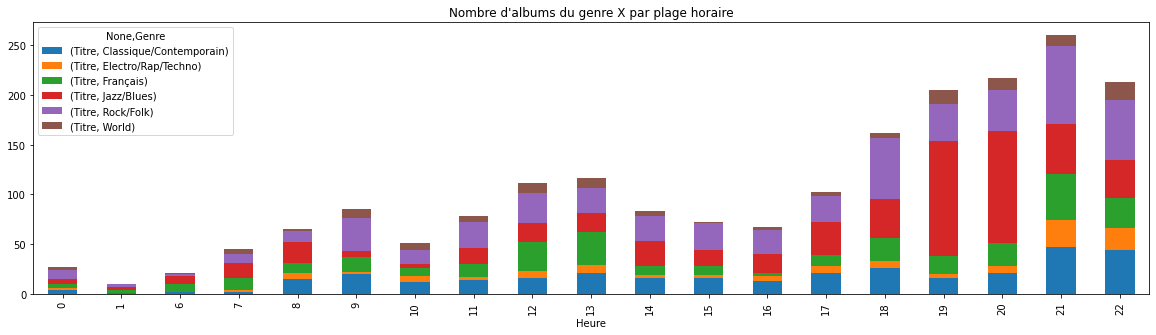

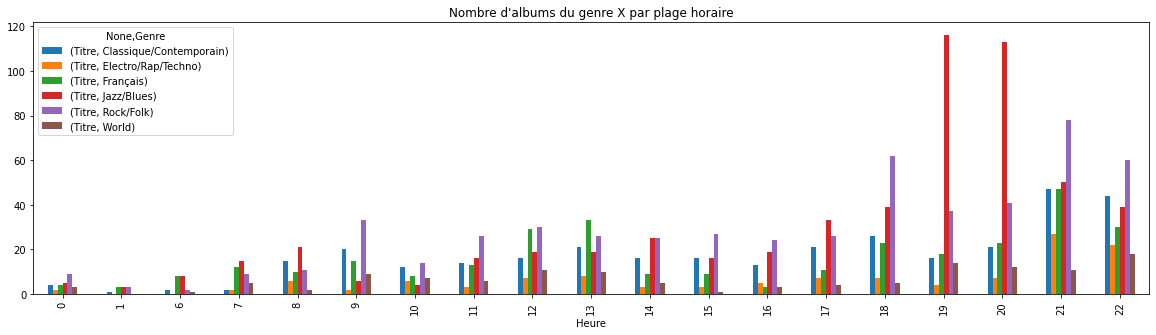

In [8]:
pd.pivot_table(filtered_period, values='Titre',index=['Heure','Genre'],aggfunc=len)\
  .unstack().plot(kind='bar',figsize=(20, 5), stacked=True, title="Nombre d'albums du genre X par plage horaire" )
pd.pivot_table(filtered_period, values='Titre',index=['Heure','Genre'],aggfunc=len)\
  .unstack().plot(kind='bar',figsize=(20, 5), stacked=False, title="Nombre d'albums du genre X par plage horaire" )

<AxesSubplot:title={'center':"Nombre d'albums du genre X par plage horaire"}, xlabel='None,Heure'>

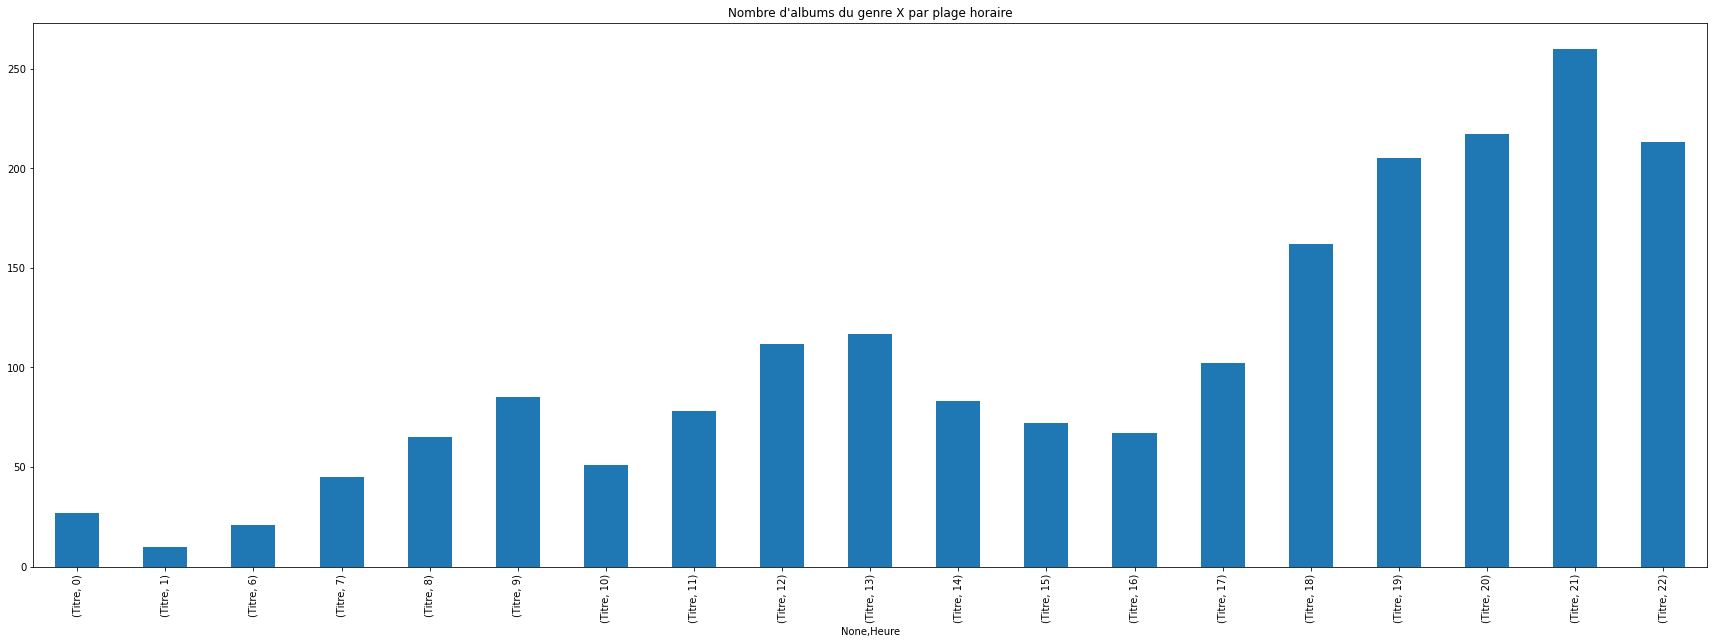

In [9]:
pd.pivot_table(filtered_period, values='Titre',index=['Heure'],aggfunc=len)\
  .unstack().plot(kind='bar',figsize=(30, 10), stacked=False, title="Nombre d'albums du genre X par plage horaire" )

**Ecoutes par week day - Tous / Rock/folk**

<AxesSubplot:title={'center':'Ecoutes par genre selon le jour de semaine'}, xlabel='Genre'>

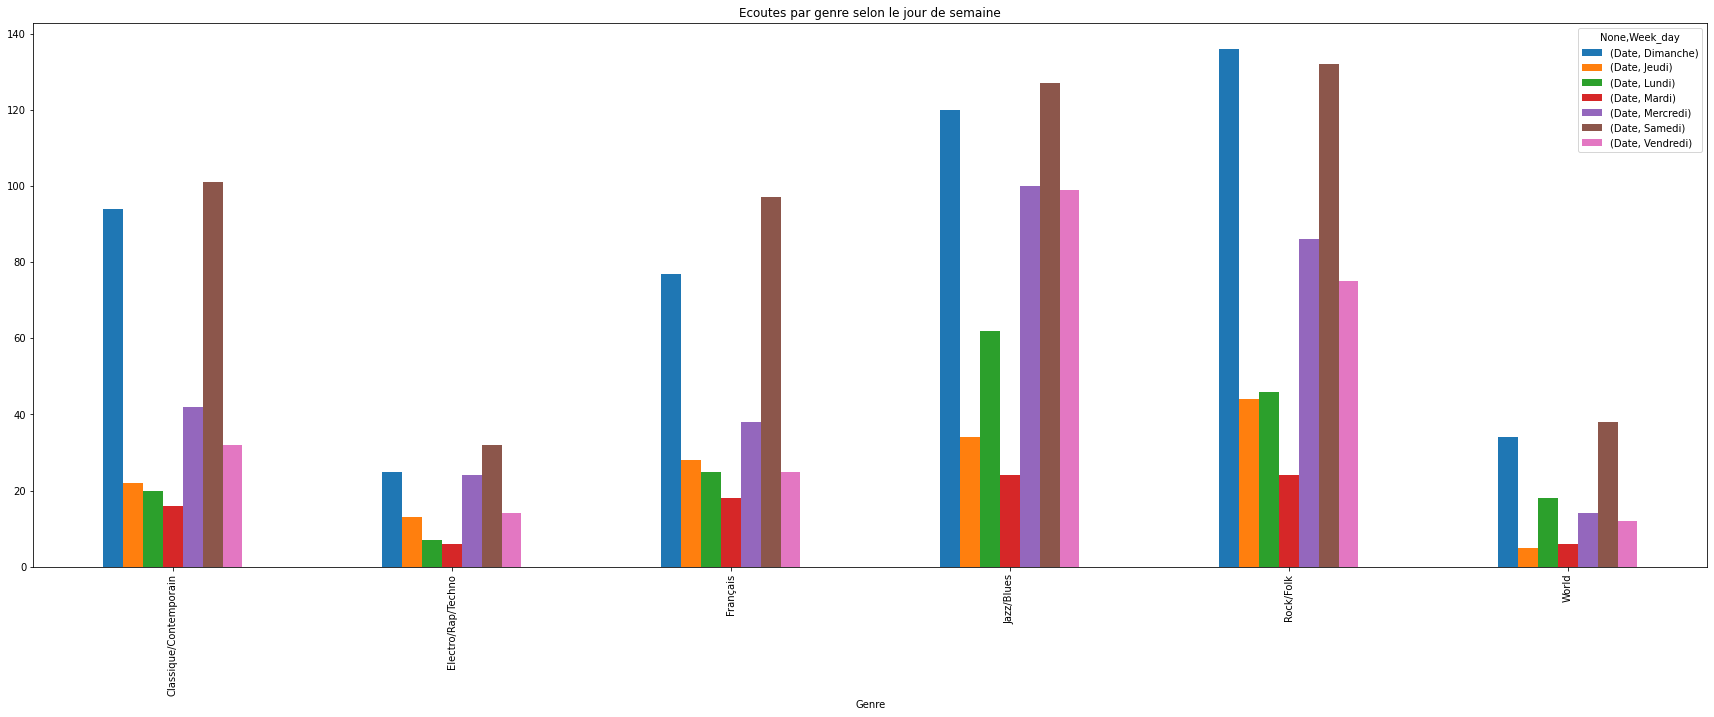

In [10]:
pd.pivot_table(filtered_period, values='Date', index=['Genre', 'Week_day'],aggfunc=len)\
    .unstack().plot(kind='bar',figsize=(30, 10), stacked=False, title="Ecoutes par genre selon le jour de semaine")

<AxesSubplot:title={'center':'Genre selon le jour de la semaine'}, xlabel='Week_day'>

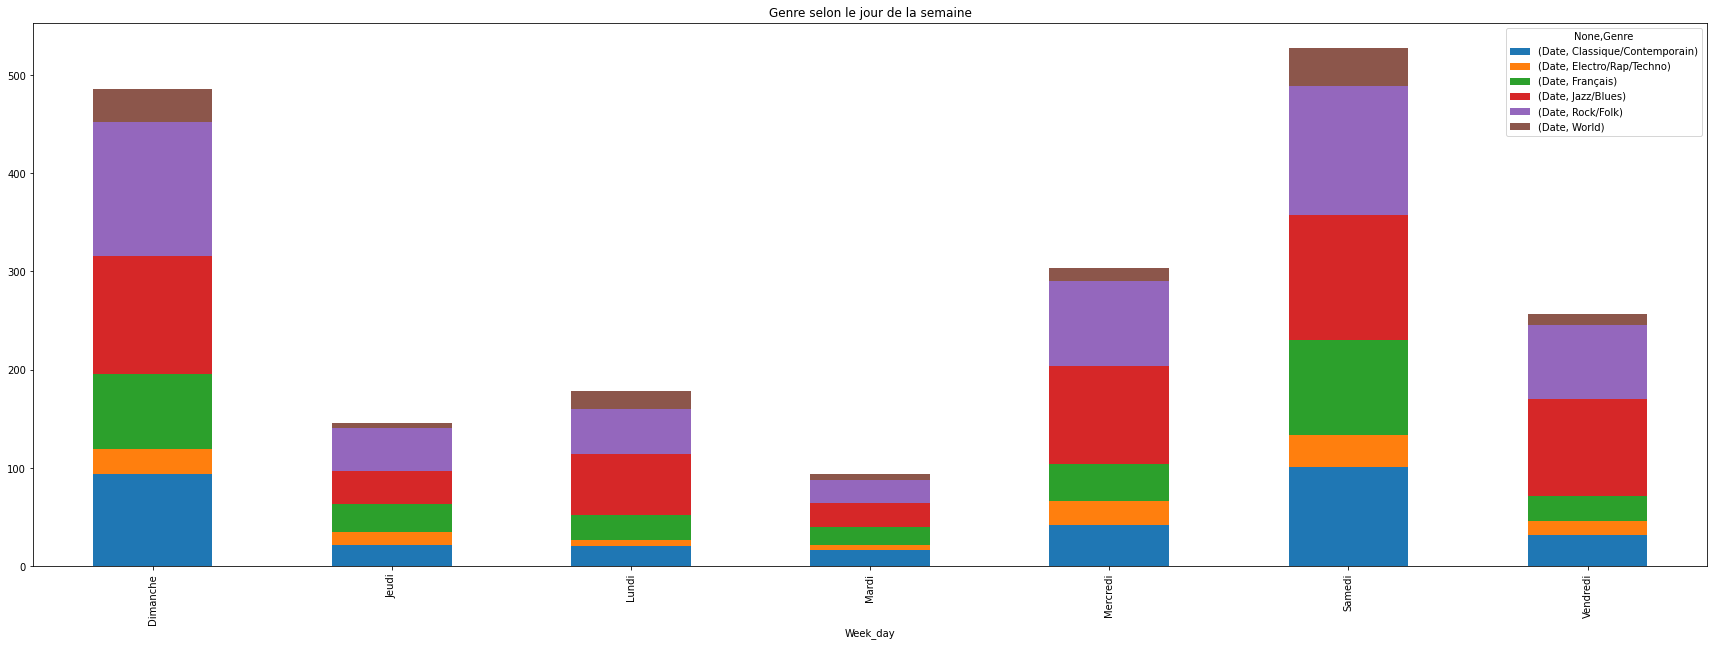

In [11]:
pd.pivot_table(filtered_period, values='Date', index=['Week_day', 'Genre'],aggfunc=len)\
    .unstack().plot(kind='bar',figsize=(30, 10), stacked=True, title="Genre selon le jour de la semaine")

<AxesSubplot:title={'center':"Nombre d'albums Rock/Folk selon le jour de la semaine"}, xlabel='None,Week_day'>

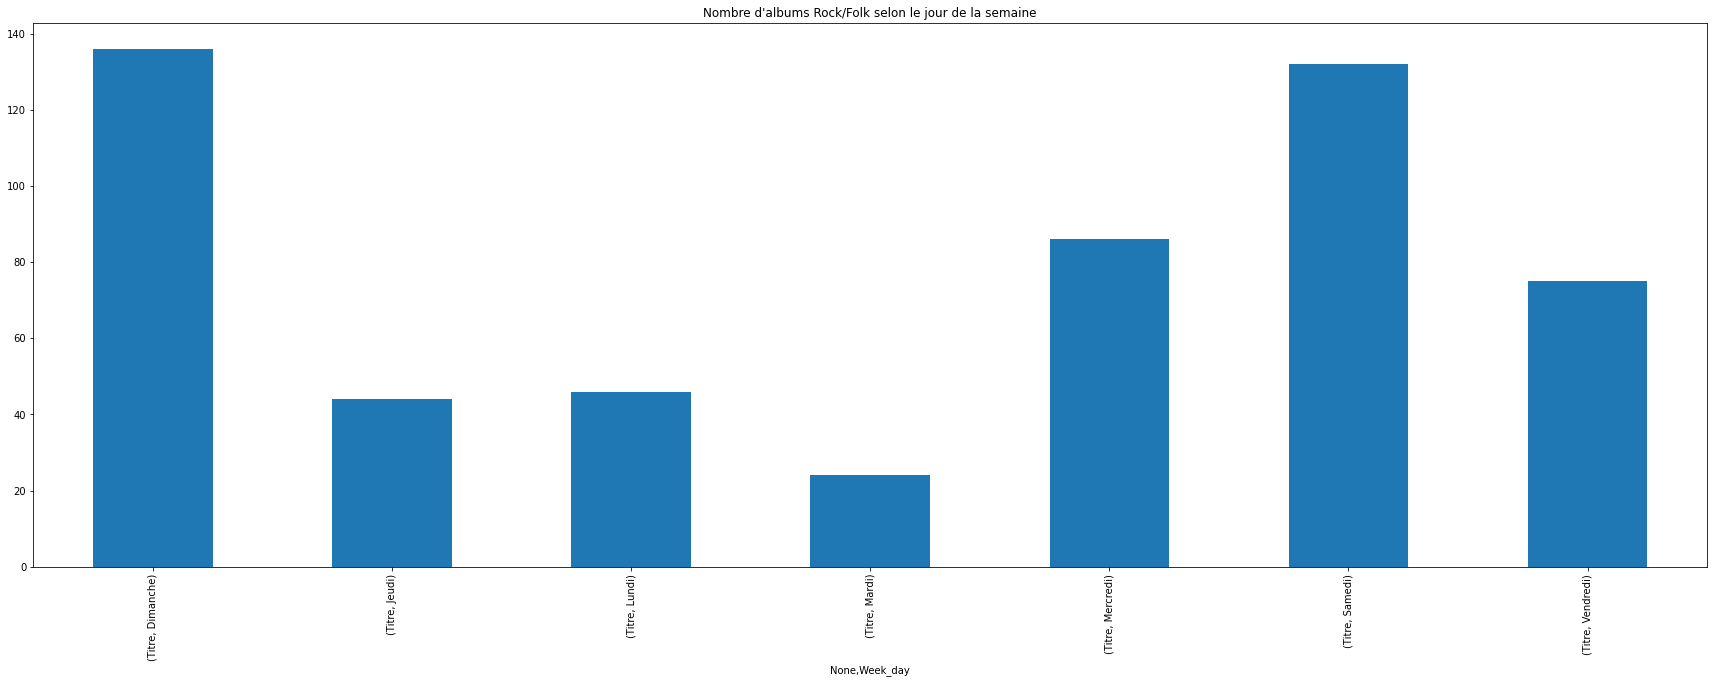

In [12]:
pd.pivot_table(filtered_genre, values='Titre',index=['Week_day'],aggfunc=len)\
  .unstack().plot(kind='bar',figsize=(30, 10), stacked=False, title="Nombre d'albums Rock/Folk selon le jour de la semaine" )

**Ecoutes par plage horaire - Genre='Rock/Folk'**

<AxesSubplot:title={'center':"Nombre d'albums du genre Rock/Folk par plage horaire"}, xlabel='None,Heure'>

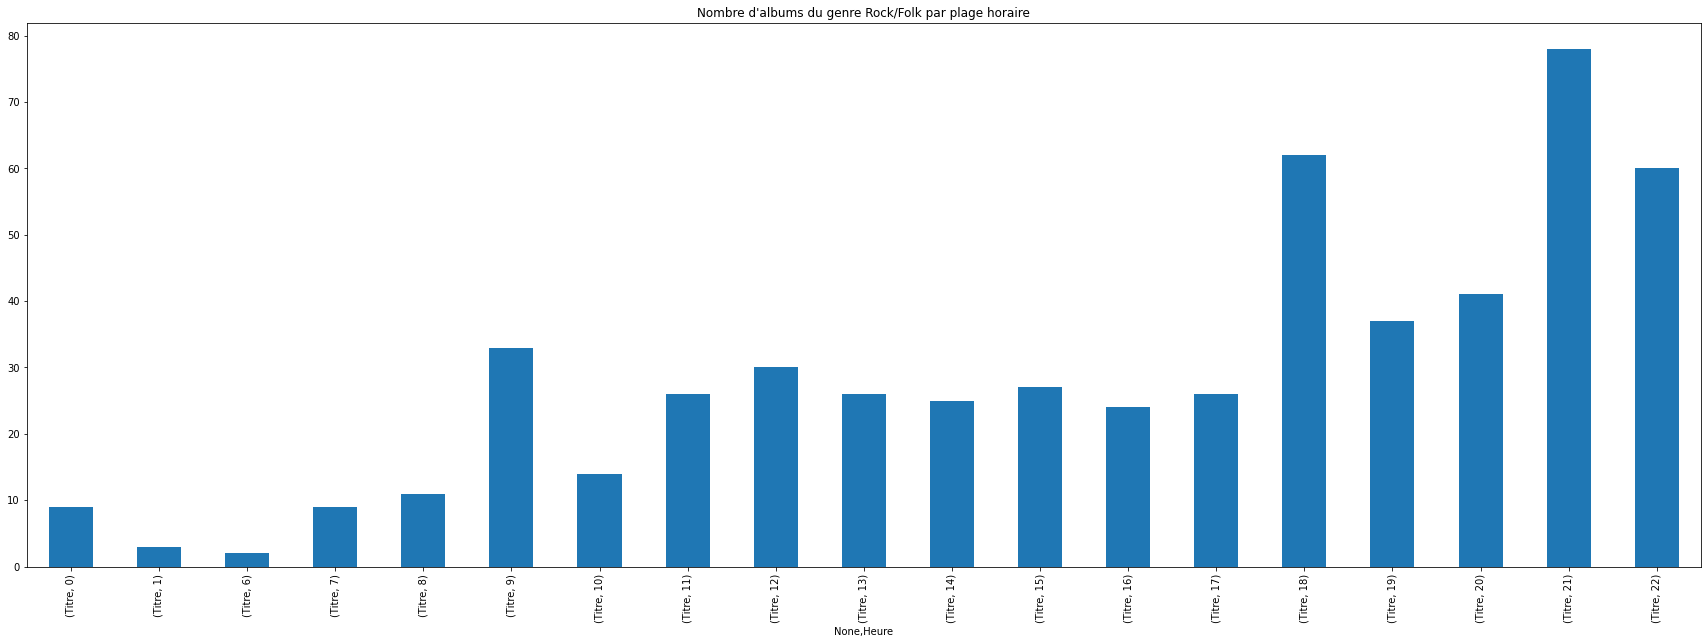

In [13]:
pd.pivot_table(filtered_genre, values='Titre',index=['Heure'],aggfunc=len)\
  .unstack().plot(kind='bar',figsize=(30, 10), stacked=False, title="Nombre d'albums du genre Rock/Folk par plage horaire" )

**Alternance des genres sur la période**

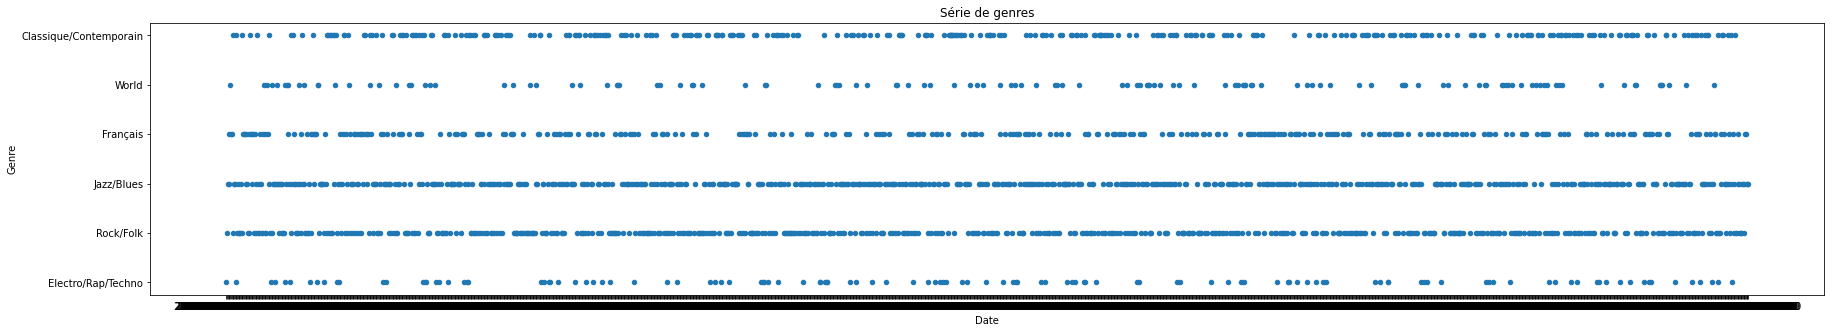

In [14]:
ax = filtered_period.plot.scatter(x='Date', y='Genre', s=20,figsize=(30, 5), title="Série de genres", colormap='viridis')

**Artistes les plus écoutés**

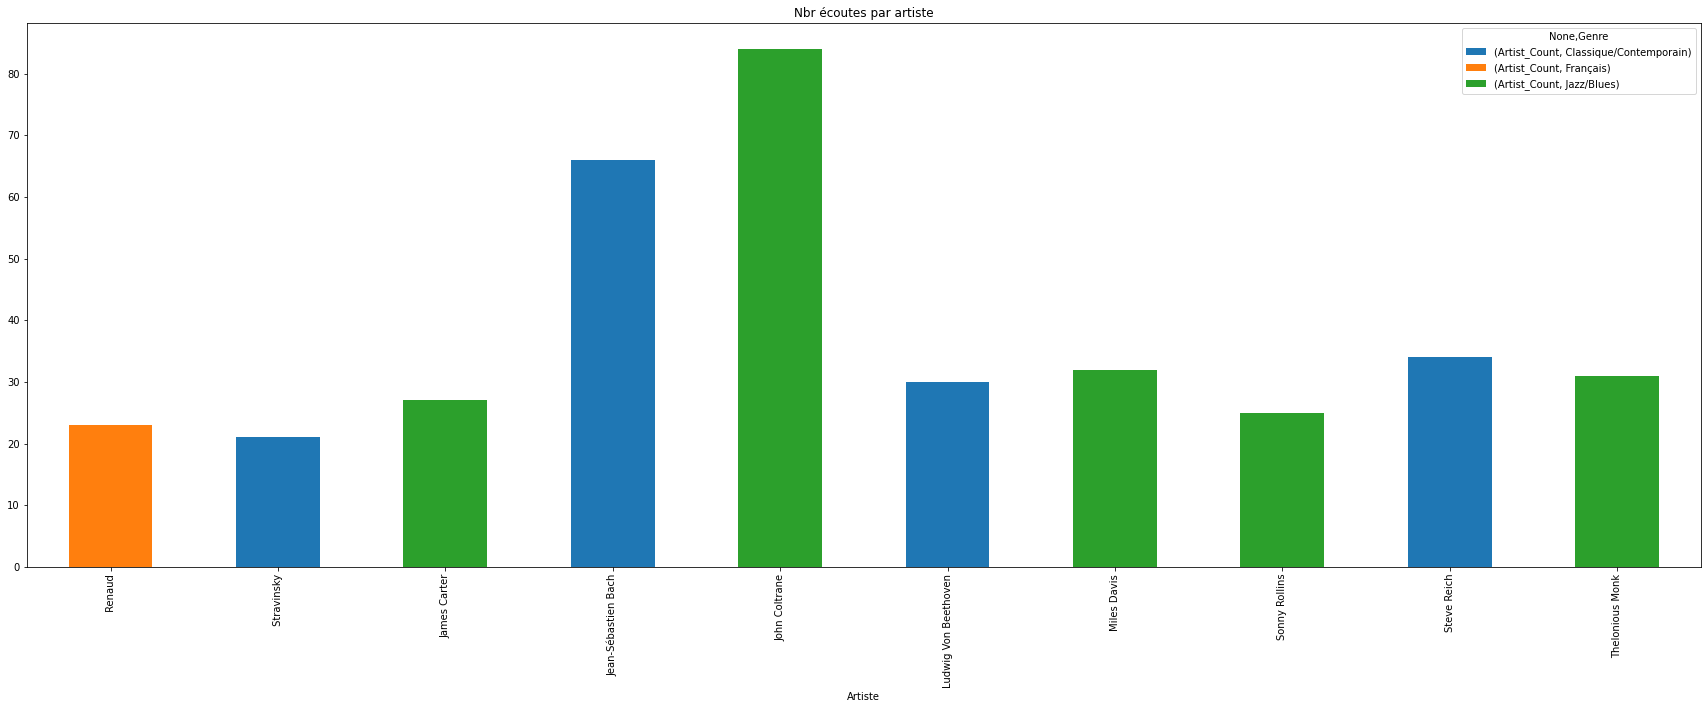

In [15]:
for artist in filtered_period.Artiste.unique():
    if(artist==" Divers"):
        nb=0
    else :
        nb = filtered_period.groupby(['Artiste']).size()[artist]
    filtered_period.loc[(filtered_period['Artiste']==artist),'Artist_Count']=nb

    freq=filtered_period.drop_duplicates(subset ="Artiste") 

    def print_most_frequent_artists(max_artists=5, freq_min=5):
        freq_artists=freq[freq['Artist_Count']>freq_min-1]
        toto=freq_artists.sort_values(by=['Artist_Count'], ascending=False,ignore_index=True)
        pd.pivot_table(toto[0:max_artists], values='Artist_Count', index=['Artiste','Genre']).unstack()\
          .plot(kind='bar',figsize=(30, 10), legend=True, stacked=True,title="Nbr écoutes par artiste")

print_most_frequent_artists(max_artists=10, freq_min=2)


**Alternance des artistes les plus écoutés sur la période**

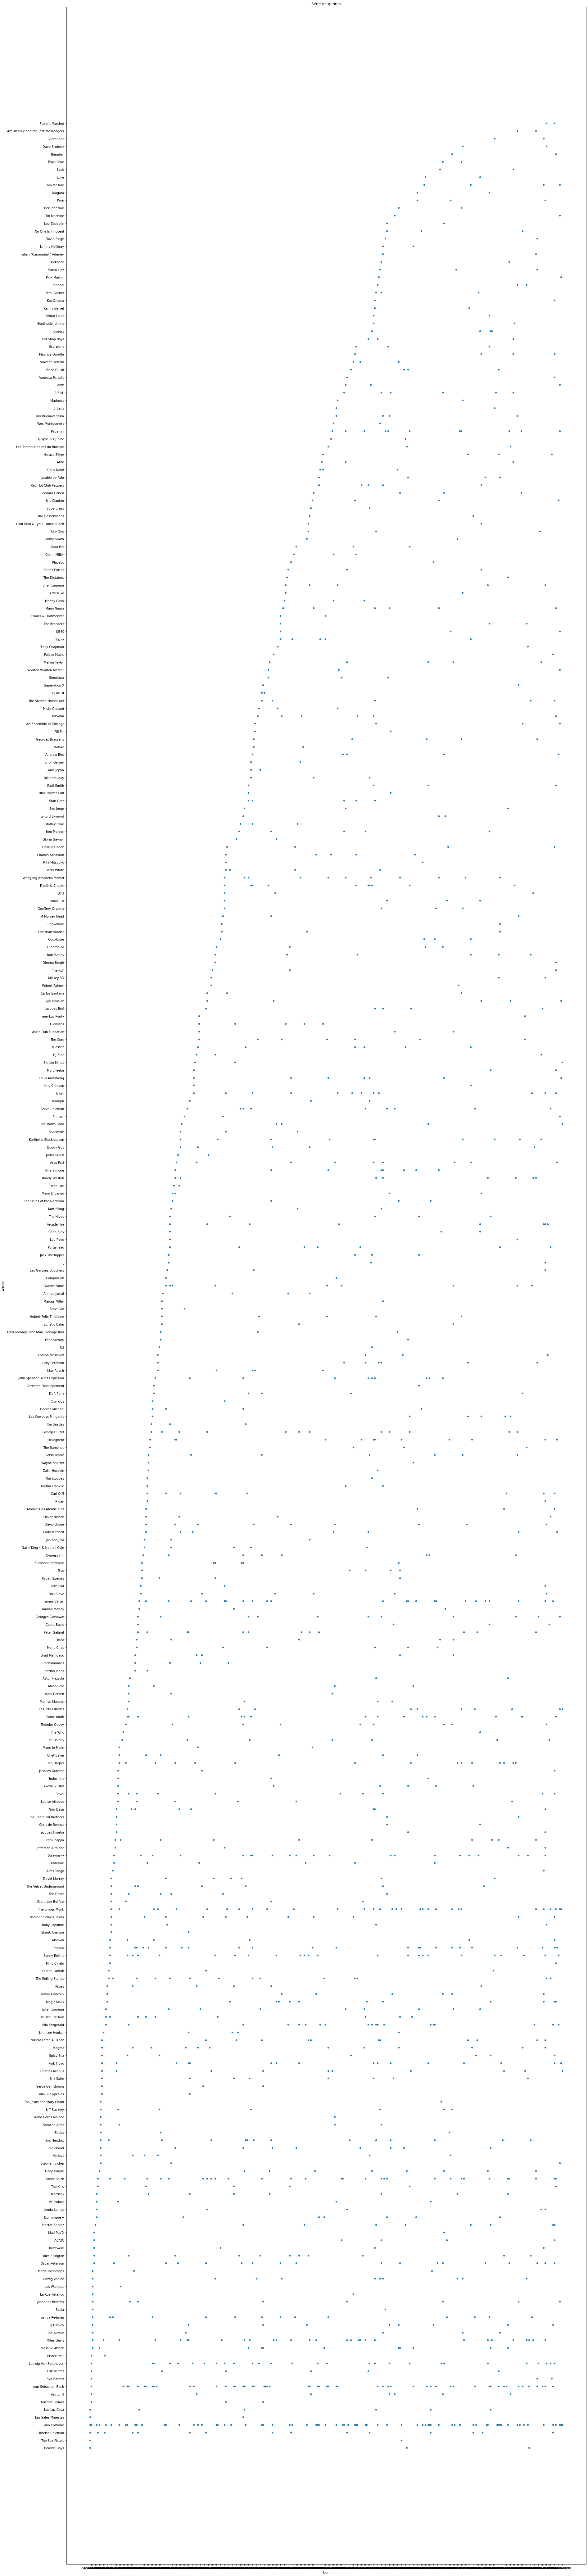

In [16]:
def print_most_frequent_artists2(max_artists=5, freq_min=5):
    freq_artists=freq[freq['Artist_Count']>freq_min-1]
    toto=freq_artists.sort_values(by=['Artist_Count'], ascending=False,ignore_index=True)
    ax=history[history['Artiste'].isin(toto.Artiste)].plot.scatter(x='Jour', y='Artiste', s=20,figsize=(30, len(toto)/2),
                                          title="Série de genres", colormap='viridis')

print_most_frequent_artists2(max_artists=20, freq_min=2)